<a href="https://colab.research.google.com/github/hseongeun/projectmanager/blob/main/9_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 이미지 다항 분류

In [ ]:
import tensorflow as tf

In [ ]:
(x_train, y_train), (x_test, y_test) = \
    tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# 전처리해서 밝기를 0 ~ 255에서 -1 ~ +1로 변환
# 0 / 127.5 -1 = -1        255 / 127.5 -1 = +1
x_train = x_train / 127.5 - 1
x_test = x_test / 127.5 - 1

In [ ]:
x_train.max()

1.0

In [ ]:
x_train.min()

-1.0

In [ ]:
from tensorflow.keras.layers import *
model = tf.keras.Sequential([
    Flatten(),
    Dense(10, activation='softmax')
])

In [ ]:
# sparse : 0(카테고리)이 10개 있을 때 3이면 0,1,2,3 번째의 위치에 있는 0을 1로 바꿔줌
model.compile(
loss=tf.keras.losses.sparse_categorical_crossentropy,
metrics=['accuracy'])

In [ ]:
result = model.fit(x_train, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4615 - accuracy: 0.8628 - val_loss: 0.3039 - val_accuracy: 0.9107
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3396 - accuracy: 0.9012 - val_loss: 0.2732 - val_accuracy: 0.9227
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3258 - accuracy: 0.9066 - val_loss: 0.2880 - val_accuracy: 0.9140
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3169 - accuracy: 0.9102 - val_loss: 0.2932 - val_accuracy: 0.9133
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3116 - accuracy: 0.9107 - val_loss: 0.2640 - val_accuracy: 0.9235
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3061 - accuracy: 0.9130 - val_loss: 0.2564 - val_accuracy: 0.9258
Epoch 7/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3029 - accuracy: 0.9136 - val_loss: 0.2620 - val_accuracy:

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2913 - accuracy: 0.9177


[0.29131123423576355, 0.9176999926567078]

In [ ]:
# x_text의 이미지로 확률 계산
prob = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [ ]:
# 0번 이미지의 확률
prob[0]

array([6.59681007e-07, 8.38165203e-13, 7.53087647e-07, 6.47590496e-04,
       4.72640096e-08, 8.65165077e-07, 1.06461315e-11, 9.99300957e-01,
       1.39291217e-06, 4.79511436e-05], dtype=float32)

In [ ]:
# 0번 이미지의 실제 레이블
y_test[0]

7

In [ ]:
# 확률이 가장 높은 레이블 구하기
# argmax = 어디가 제일 크냐
y_pred = prob.argmax(axis = 1)

In [ ]:
y_pred   # 확률이 가장 높은 레이블들

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_test   # 정답

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### 손글씨 입력해보기

In [ ]:
from PIL import Image
img = Image.open ('hand.png').convert('L')
img

In [ ]:
# 이미지를 숫자로 바꾸기
import numpy as np
x = np.array(img)

In [ ]:
# 그림의 정수, 가로, 세로
x_train.shape

(60000, 28, 28)

In [ ]:
x.shape

(28, 28)

In [ ]:
# 전처리
x = np.expand_dims(x, 0)
x = x / 127.5 - 1

In [ ]:
# 전처리 1번하면 1이 한번 뜨고, 2번하면 두번 뜸. -> 1번만 떠야함
x.shape

(1, 28, 28)

In [ ]:
# 확률 예측
prob = model.predict(x)

1/1 [==============================] - 0s 53ms/step


In [ ]:
# 확률이 제일 높은 레이블
prob.argmax(axis=1)

array([6])

### 이미지 파일로 모형 학습

In [ ]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
!unzip cats_and_dogs_filtered.zip

In [61]:
data_dir = 'cats_and_dogs_filtered'
BATCH_SIZE = 32   # 너무 많으면 시간이 오래 걸리기 때문에 32 정도가 적당
IMG_SIZE = (224,224)

In [62]:
# 훈련 데이터 로딩
train_dataset = \
    tf.keras.preprocessing.image_dataset_from_directory(
        f'{data_dir}/train',  # 어디에서 가져올 거냐, data_dir 내 train
        shuffle=True,  # 골고루 섞어서 불러와라
        batch_size=BATCH_SIZE,
        image_size=IMG_SIZE)

Found 2000 files belonging to 2 classes.


In [64]:
# 검증 데이터 로딩
validation_dataset = \
    tf.keras.preprocessing.image_dataset_from_directory(
        f'{data_dir}/validation',
        shuffle=False,
        batch_size=BATCH_SIZE,
        image_size=IMG_SIZE)

Found 1000 files belonging to 2 classes.


In [65]:
# 모형 정의
model = tf.keras.Sequential([
    Rescaling(scale=1/127.5, offset=-1), # rescaling : 전처리 / scale만큼 곱해주고, offset 더해줌
    Flatten(),
    Dense(1, activation="sigmoid"),  # 이항분류
])

#### offset 을 -1로 설정한 이유

0 ~ 255 를 -1 ~ +1로 바꿀때 -1씩 더했기 때문

-1로 설정하는 것이 가장 무난하고 좋음

In [66]:
# 훈련
model.compile(
    loss="binary_crossentropy",
    metrics=["accuracy"])

model.fit(train_dataset, validation_data=validation_dataset)

63/63 [==============================] - 8s 106ms/step - loss: 7.9390 - accuracy: 0.5165 - val_loss: 10.1504 - val_accuracy: 0.5380


### 티처블 머신 모델 불러오기

In [67]:
# 모델 불러오기
from tensorflow.keras.models import load_model
tm = load_model('keras_model.h5')

# 전처리
model = tf.keras.Sequential([
    Resizing(224, 224),     # 그림크기를 224,224로 변환
    Rescaling(scale=1/127.5, offset=-1),
    tm
])

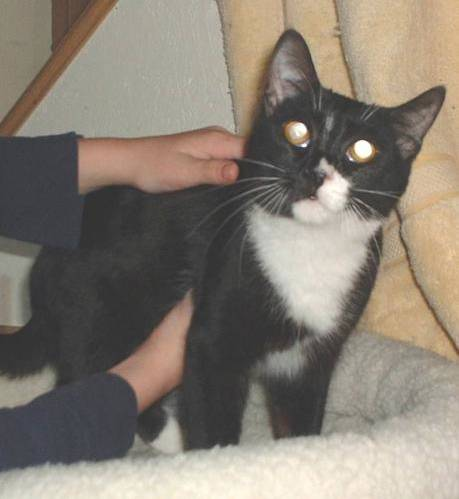

In [70]:
img = Image.open(
    'cats_and_dogs_filtered/validation/cats/cat.2000.jpg')
img

In [72]:
a = np.asarray (img , dtype ='float32')   # 실수로 변환
a.shape   # 가로, 세로, 3색(RGB)

In [73]:
data = np.expand_dims(a,0)
data.shape   # 그림 장수(1장), 가로, 세로, 3색(RGB)

In [74]:
# 예측(사진 1장을 넣었을 때)
model.predict(data)  # 확률 0번(cats), 1번(dogs) 순서로 표시

1/1 [==============================] - 2s 2s/step


array([[0.9857836 , 0.01421646]], dtype=float32)

In [75]:
# 가지고 있는 사진 1000장을 다 집어넣어서 성능테스트
# teachable machine에서 이미 학습을 시켰기 때문에 evaluate을 해야함
model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.evaluate(validation_dataset)   # loss, accuracy 값 순서대로 표시

32/32 [==============================] - 24s 614ms/step - loss: 0.1448 - accuracy: 0.9460


[0.14475210011005402, 0.9459999799728394]

이항분류 : Dense(1, sigmoid) or Dense(1, softmax)

model.fit -> 학습

model.evaluate -> 평가 & 테스트

데이터가 적은데, 논리를 너무 복잡하게 가져가면 예측력 낮아짐


적당한 epoch?

성능을 기준으로 판단

---
새로운 데이터를 줬을 때

 - 예측을 잘 한다면(적당함)

 - 예측 못함(epoch 너무적거나 많음)

---
-> epoch마다 저장을 해뒀다가 가장 성능 좋은 epoch를 불러오면 됨

### 전이 학습(Transfer Learning)

근원 문제(source)에 학습시킨 모형을 새로운 대상 문제 (target)에 적용하는 것

사전 학습(pretraining) : 근원 문제에 학습 시키는 것, **많은 데이터**를 사용

미세 조정(fine tuning) : 대상 문제에 학습 시키는 것, **적은 데이터**를 사용
- 무작위로 초기화된 모형을 처음부터 학습시키는 것보다 다른 문제에라도 학습시킨 모형을 추가 학습시키는 것이 학습에 유리할 가능성이 높음
- 이미지 처리 과제는 비슷한 특징들을 공유하므로 무작위로 초기화된 것보다는 유사할 가능성이 높음
- 일반적으로 근원 문제에 학습킬 때보다 작은 학습률을 사용

기초 모델(foundation model) : 컴퓨터 비전이나 자연어 처리처럼 넓은 종류의 분야에 대해 적용할 수 있는 하나의 모델
- 기초 모델을 대량의 데이터로 사전 학습
- 사전 학습된 모델을 개별 과업에 맞춰 미세하게 수정해서 사용하는 것
- '만능 모델을 하나 만들자'는 생각에서 비롯

--> 모델을 직접 만드는 것은 이제 X, 만들어진 모델을 이용하는 것이 중요이자 트렌드

#### 전이 학습의 방식
1. 사전학습된 모형을 추가 학습 없이 그대로 사용

 -> 요즘은 ChatGPT와 컴퓨터 비전을 결합해서 사용

2. 사전학습된 모형의 전반부를 특징 추출기로 사용 + 후반부에 분류기(예 : Dense(10, softmax))만 추가하고 추가된 부분만 학습

 -> 속도가 빠름

3. 사전 학습된 부분을 포함해서 전체적으로 미세 조정

기술이 발전할수록 1번 사용

요즘은 2번까지 되어있고, 3번은 거의 없음